In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
train.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
CT = test
train.drop(["society"],axis=1,inplace = True)
CT.drop(["society"],axis=1,inplace = True)
train.dropna(subset=['size'],axis = 0,inplace = True)
train.dropna(subset=['location'],axis = 0,inplace = True)
train.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             57
balcony         593
price             0
dtype: int64

In [6]:
train.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
Nos1 = range(0,13303)
Nos2 = range(0,1480)
df1 = pd.DataFrame({'labels' : Nos1})
train.set_index(df1['labels'],inplace = True)
df2 = pd.DataFrame({'labels' : Nos2})
CT.set_index(df2['labels'],inplace = True)
train.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
labels,,,,,,,,
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
train.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [9]:
train['availability'] = train['availability'].str.replace('Ready To Move','1-Jan')
train['availability'] = train['availability'].str.replace('Immediate Possession','1-Jan')
CT['availability'] = CT['availability'].str.replace('Ready To Move','1-Jan')
CT['availability'] = CT['availability'].str.replace('Immediate Possession','1-Jan')

In [10]:
import re
train['size'] = train['size'].astype(str)
CT['size'] = CT['size'].astype(str)
CT['size']

labels
0           2 BHK
1       9 Bedroom
2       4 Bedroom
3           3 BHK
4           2 BHK
5       4 Bedroom
6       4 Bedroom
7           2 BHK
8           3 BHK
9           3 BHK
10          3 BHK
11      4 Bedroom
12          4 BHK
13          2 BHK
14          3 BHK
15      9 Bedroom
16          1 BHK
17          2 BHK
18          2 BHK
19      3 Bedroom
20          2 BHK
21          3 BHK
22      1 Bedroom
23          3 BHK
24          3 BHK
25          3 BHK
26          3 BHK
27          3 BHK
28          2 BHK
29          3 BHK
          ...    
1450        2 BHK
1451    2 Bedroom
1452        2 BHK
1453        3 BHK
1454        2 BHK
1455        3 BHK
1456        2 BHK
1457        3 BHK
1458    8 Bedroom
1459        3 BHK
1460        3 BHK
1461        3 BHK
1462        2 BHK
1463        2 BHK
1464        2 BHK
1465        3 BHK
1466    4 Bedroom
1467        2 BHK
1468        2 BHK
1469    8 Bedroom
1470        2 BHK
1471        3 BHK
1472    1 Bedroom
1473    4 Bedroom
147

In [11]:
train['size'] = train['size'].str.split(' ').str[0]
CT['size'] = CT['size'].str.split(' ').str[0]
CT.head

<bound method NDFrame.head of                    area_type availability                         location  \
labels                                                                       
0       Super built-up  Area        1-Jan                      Brookefield   
1                 Plot  Area        1-Jan                    Akshaya Nagar   
2                 Plot  Area       18-Apr                      Hennur Road   
3       Super built-up  Area        1-Jan                Kodichikkanahalli   
4       Super built-up  Area        1-Jan                      Konanakunte   
5                 Plot  Area        1-Jan               5th Phase JP Nagar   
6             Built-up  Area        1-Jan                      Vijayanagar   
7             Built-up  Area        1-Jan                      BEML Layout   
8       Super built-up  Area        1-Jan                      Thanisandra   
9             Built-up  Area        1-Jan                       NRI Layout   
10      Super built-up  Area      

In [12]:
train['total_sqft'] = train['total_sqft'].astype(str)
CT['total_sqft'] = CT['total_sqft'].astype(str)

In [13]:
SQM = train[train['total_sqft'].str.contains('Meter')]
SQM['total_sqft'] = 10.7639*(SQM['total_sqft'].str.split('S').str[0]).astype(float)

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
SYM = train.loc[train['total_sqft'].str.contains('Yards')]
SYM['total_sqft'] = 9*(SYM['total_sqft'].str.split('S').str[0]).astype(float)

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
Acres = train.loc[train['total_sqft'].str.contains('Acres')]
Acres['total_sqft'] = 43560*(Acres['total_sqft'].str.split('A').str[0]).astype(float)

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
Cents = train.loc[train['total_sqft'].str.contains('Cents')]
Cents['total_sqft'] = 435.6*(Cents['total_sqft'].str.split('C').str[0]).astype(float)

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
Perch = train.loc[train['total_sqft'].str.contains('Perch')]
Perch['total_sqft'] = 272.25*(Perch['total_sqft'].str.split('P').str[0]).astype(float)

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
Guntha = train.loc[train['total_sqft'].str.contains('Guntha')]
Guntha['total_sqft'] = 1089*(Guntha['total_sqft'].str.split('G').str[0]).astype(float)

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
G = train.loc[train['total_sqft'].str.contains('Grounds')]
G['total_sqft'] = 2400*(G['total_sqft'].str.split('G').str[0]).astype(float)

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
R = train.loc[train['total_sqft'].str.contains('-')]
R['total_sqft'] = ((R['total_sqft'].str.split('-').str[0]).astype(float) + (R['total_sqft'].str.split('-').str[1]).astype(float))/2

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
## CT
SQMt = CT[CT['total_sqft'].str.contains('Meter')]
SQMt['total_sqft'] = 10.7639*(SQMt['total_sqft'].str.split('S').str[0]).astype(float)
SYMt = CT.loc[CT['total_sqft'].str.contains('Yards')]
SYMt['total_sqft'] = 9*(SYMt['total_sqft'].str.split('S').str[0]).astype(float)
Acrest = CT.loc[CT['total_sqft'].str.contains('Acres')]
Acrest['total_sqft'] = 43560*(Acrest['total_sqft'].str.split('A').str[0]).astype(float)
Centst = CT.loc[CT['total_sqft'].str.contains('Cents')]
Centst['total_sqft'] = 435.6*(Centst['total_sqft'].str.split('C').str[0]).astype(float)
Percht = CT.loc[CT['total_sqft'].str.contains('Perch')]
Percht['total_sqft'] = 272.25*(Percht['total_sqft'].str.split('P').str[0]).astype(float)
Gunthat = CT.loc[CT['total_sqft'].str.contains('Guntha')]
Gunthat['total_sqft'] = 1089*(Gunthat['total_sqft'].str.split('G').str[0]).astype(float)
Gt = CT.loc[CT['total_sqft'].str.contains('Grounds')]
Gt['total_sqft'] = 2400*(Gt['total_sqft'].str.split('G').str[0]).astype(float)
Rt = CT.loc[CT['total_sqft'].str.contains('-')]
Rt['total_sqft'] = ((Rt['total_sqft'].str.split('-').str[0]).astype(float) + (Rt['total_sqft'].str.split('-').str[1]).astype(float))/2
NNt = pd.concat([SQMt,SYMt,Acrest,Centst,Gunthat,Gt,Rt,Percht])
nnt = NNt.index
Nott = CT.loc[~(CT.index).isin(nnt)]
CT = pd.concat([Nott,NNt])
CT.head

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

<bound method NDFrame.head of                    area_type availability                        location  \
labels                                                                      
0       Super built-up  Area        1-Jan                     Brookefield   
1                 Plot  Area        1-Jan                   Akshaya Nagar   
2                 Plot  Area       18-Apr                     Hennur Road   
3       Super built-up  Area        1-Jan               Kodichikkanahalli   
4       Super built-up  Area        1-Jan                     Konanakunte   
5                 Plot  Area        1-Jan              5th Phase JP Nagar   
6             Built-up  Area        1-Jan                     Vijayanagar   
7             Built-up  Area        1-Jan                     BEML Layout   
8       Super built-up  Area        1-Jan                     Thanisandra   
9             Built-up  Area        1-Jan                      NRI Layout   
10      Super built-up  Area        1-Jan     

In [22]:
NN = pd.concat([SQM,SYM,Acres,Cents,Guntha,G,R,Perch])

In [23]:
nn = NN.index

In [24]:
Not = train.loc[~(train.index).isin(nn)]

In [25]:
MM = pd.concat([Not,NN])
MM.head

<bound method NDFrame.head of                    area_type availability                  location size  \
labels                                                                     
0       Super built-up  Area       19-Dec  Electronic City Phase II    2   
1                 Plot  Area        1-Jan          Chikka Tirupathi    4   
2             Built-up  Area        1-Jan               Uttarahalli    3   
3       Super built-up  Area        1-Jan        Lingadheeranahalli    3   
4       Super built-up  Area        1-Jan                  Kothanur    2   
5       Super built-up  Area        1-Jan                Whitefield    2   
6       Super built-up  Area       18-May          Old Airport Road    4   
7       Super built-up  Area        1-Jan              Rajaji Nagar    4   
8       Super built-up  Area        1-Jan              Marathahalli    3   
9                 Plot  Area        1-Jan              Gandhi Bazar    6   
10      Super built-up  Area       18-Feb                W

In [26]:
MM.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
labels,,,,,,,,
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,1-Jan,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,1-Jan,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,1-Jan,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,1-Jan,Kothanur,2,1200,2.0,1.0,51.00


In [27]:
MM['availability']=MM['availability'].astype(str)
CT['availability']=CT['availability'].astype(str)

In [28]:
from datetime import datetime,timedelta
from datetime import date
MM['availability'] =  pd.to_datetime(MM['availability'], format='%d-%b')
Nos = range(0,13303)
TT = pd.DataFrame({'labels' : '1-Jan','numbers' : Nos})
TT['labels'] = pd.to_datetime(TT['labels'], format = '%d-%b')
MM.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            12774, 12844, 12938, 12958, 12973, 13042, 13223, 13248, 13282,
              646],
           dtype='int64', name='labels', length=13303)

In [29]:
from datetime import datetime,timedelta
from datetime import date
CT['availability'] =  pd.to_datetime(CT['availability'], format='%d-%b')
Nost = range(0,1480)
TTt = pd.DataFrame({'labels' : '1-Jan','numbers' : Nost})
TTt['labels'] = pd.to_datetime(TTt['labels'], format = '%d-%b')

In [30]:
At = (CT['availability'].subtract(TTt['labels']))
At

0        0 days
1        0 days
2      107 days
3        0 days
4        0 days
5        0 days
6        0 days
7        0 days
8        0 days
9        0 days
10       0 days
11       0 days
12       0 days
13       0 days
14       0 days
15       0 days
16       0 days
17       0 days
18       0 days
19       0 days
20     351 days
21     198 days
22       0 days
23       0 days
24       0 days
25       0 days
26       0 days
27     198 days
28       0 days
29       0 days
         ...   
1450     0 days
1451     0 days
1452     0 days
1453     0 days
1454   137 days
1455    48 days
1456     0 days
1457     0 days
1458     0 days
1459     0 days
1460     0 days
1461     0 days
1462   351 days
1463     0 days
1464   351 days
1465     0 days
1466     0 days
1467     0 days
1468     0 days
1469     0 days
1470     0 days
1471     0 days
1472   229 days
1473     0 days
1474     0 days
1475     0 days
1476     0 days
1477     0 days
1478    48 days
1479     0 days
dtype: timedelta64[ns]

In [31]:
A = (MM['availability'].subtract(TT['labels']))
A

0       352 days
1         0 days
2         0 days
3         0 days
4         0 days
5         0 days
6       137 days
7         0 days
8         0 days
9         0 days
10       48 days
11        0 days
12        0 days
13        0 days
14        0 days
15        0 days
16        0 days
17        0 days
18        0 days
19        0 days
20        0 days
21      352 days
22        0 days
23        0 days
24      321 days
25      137 days
26        0 days
27      353 days
28      289 days
29        0 days
          ...   
13273     0 days
13274    17 days
13275   198 days
13276     0 days
13277     0 days
13278    48 days
13279     0 days
13280     0 days
13281     0 days
13282   351 days
13283     0 days
13284     0 days
13285     0 days
13286     0 days
13287     0 days
13288     0 days
13289     0 days
13290     0 days
13291     0 days
13292     0 days
13293     0 days
13294     0 days
13295     0 days
13296     0 days
13297     0 days
13298     0 days
13299     0 days
13300     0 da

In [32]:
MM['availability']=(A.iloc[0:13303]).astype(str)
CT['availability']=(At.iloc[0:1480]).astype(str)
CT

,area_type,availability,location,size,total_sqft,bath,balcony,price
labels,,,,,,,,
0,Super built-up Area,0 days 00:00:00.000000000,Brookefield,2,1225,2.0,2.0,NaN
1,Plot Area,0 days 00:00:00.000000000,Akshaya Nagar,9,2400,9.0,2.0,NaN
2,Plot Area,107 days 00:00:00.000000000,Hennur Road,4,1650,5.0,2.0,NaN
3,Super built-up Area,0 days 00:00:00.000000000,Kodichikkanahalli,3,1322,3.0,1.0,NaN
4,Super built-up Area,0 days 00:00:00.000000000,Konanakunte,2,1161,2.0,1.0,NaN
5,Plot Area,0 days 00:00:00.000000000,5th Phase JP Nagar,4,760,3.0,1.0,NaN
6,Built-up Area,0 days 00:00:00.000000000,Vijayanagar,4,4500,4.0,1.0,NaN
7,Built-up Area,0 days 00:00:00.000000000,BEML Layout,2,960,2.0,0.0,NaN
8,Super built-up Area,0 days 00:00:00.000000000,Thanisandra,3,1569,3.0,1.0,NaN


In [33]:
MM['availability'] = MM['availability'].str.split(' ').str[0]
CT['availability'] = CT['availability'].str.split(' ').str[0]
CT['size'] = CT['size'].str.replace('nan','2')

In [34]:
MM.isnull().sum()
CC = MM[~(MM.bath.isnull())]
DD = MM[(MM.bath.isnull())]
y1 = CC['bath']
y2 = CC['balcony']
CC.drop(["area_type","price","location","balcony","bath"],axis=1,inplace = True)

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
from sklearn import linear_model
regbath = linear_model.LinearRegression()
regbath.fit(CC,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
DD.drop(["area_type","price","location","balcony","bath"],axis=1,inplace = True)

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
Y = regbath.predict(DD)

In [38]:
Y = Y.astype(int)

In [39]:
CC = MM[~(MM.bath.isnull())]
DD = MM[(MM.bath.isnull())]

In [40]:
DD['bath'] = Y

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
Y

array([1, 2, 1, 1, 3, 3, 1, 4, 3, 3, 2, 4, 4, 3, 3, 2, 1, 1, 3, 3, 3, 3,
       2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2,
       2, 3, 2, 1, 3, 2, 2, 3, 2, 2, 3, 3, 1])

In [42]:
AA = pd.concat([CC,DD],axis = 0)

In [43]:
CT.drop(['price'],axis=1,inplace=True)
CT.head

<bound method NDFrame.head of                    area_type availability                        location  \
labels                                                                      
0       Super built-up  Area            0                     Brookefield   
1                 Plot  Area            0                   Akshaya Nagar   
2                 Plot  Area          107                     Hennur Road   
3       Super built-up  Area            0               Kodichikkanahalli   
4       Super built-up  Area            0                     Konanakunte   
5                 Plot  Area            0              5th Phase JP Nagar   
6             Built-up  Area            0                     Vijayanagar   
7             Built-up  Area            0                     BEML Layout   
8       Super built-up  Area            0                     Thanisandra   
9             Built-up  Area            0                      NRI Layout   
10      Super built-up  Area            0     

In [44]:
## CT bath 

CCt = CT[~(CT.bath.isnull())]
DDt = CT[(CT.bath.isnull())]
y1t = CCt['bath']
y2t = CCt['balcony']
CCt.drop(["area_type","location","balcony","bath"],axis=1,inplace = True)
from sklearn import linear_model
regbatht = linear_model.LinearRegression()
regbatht.fit(CCt,y1t)
DDt.drop(["area_type","location","balcony","bath"],axis=1,inplace = True)
Yt = regbatht.predict(DDt)
Yt = Yt.astype(int)
CCt = CT[~(CT.bath.isnull())]
DDt = CT[(CT.bath.isnull())]
DDt['bath'] = Yt
CT = pd.concat([CCt,DDt],axis = 0)
CT.isnull().sum()

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


area_type        0
availability     0
location         0
size             0
total_sqft       0
bath             0
balcony         69
dtype: int64

In [45]:
CC = AA[~(AA.balcony.isnull())]
DD = AA[(AA.balcony.isnull())]
y2 = CC['balcony']
CC.drop(["area_type","price","location","balcony","bath"],axis=1,inplace = True)
DD.drop(["area_type","price","location","balcony","bath"],axis=1,inplace = True)
regbalcony = linear_model.LinearRegression()
regbalcony.fit(CC,y2)
Y2 = regbalcony.predict(DD)
CC = AA[~(AA.balcony.isnull())]
DD = AA[(AA.balcony.isnull())]
DD['balcony'] = Y2.astype(int)
AA = pd.concat([CC,DD],axis = 0)
Dat = pd.concat([CC,DD],axis = 0)

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
# CT balcony
CCt = CT[~(CT.balcony.isnull())]
DDt = CT[(CT.balcony.isnull())]
y2t = CCt['balcony']
CCt.drop(["area_type","location","balcony","bath"],axis=1,inplace = True)
DDt.drop(["area_type","location","balcony","bath"],axis=1,inplace = True)
regbalconyt = linear_model.LinearRegression()
regbalconyt.fit(CCt,y2t)
Y2t = regbalcony.predict(DDt)
CCt = CT[~(CT.balcony.isnull())]
DDt = CT[(CT.balcony.isnull())]
DDt['balcony'] = Y2t.astype(int)
DDt.head

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<bound method NDFrame.head of                    area_type availability                  location size  \
labels                                                                     
9             Built-up  Area            0                NRI Layout    3   
36                Plot  Area            0                Whitefield    5   
150     Super built-up  Area          287         Thippasandra main    3   
207               Plot  Area            0                  Abbigere    4   
211     Super built-up  Area            0              Marathahalli    3   
214               Plot  Area            0                R.T. Nagar    7   
224     Super built-up  Area          137              Haralur Road    4   
247     Super built-up  Area            0           Kalena Agrahara    2   
269     Super built-up  Area            0          Old Airport Road    4   
291     Super built-up  Area            0       8th Block Jayanagar    4   
322     Super built-up  Area            0            Laksh

In [47]:
CCt.head

<bound method NDFrame.head of                    area_type availability                         location  \
labels                                                                       
0       Super built-up  Area            0                      Brookefield   
1                 Plot  Area            0                    Akshaya Nagar   
2                 Plot  Area          107                      Hennur Road   
3       Super built-up  Area            0                Kodichikkanahalli   
4       Super built-up  Area            0                      Konanakunte   
5                 Plot  Area            0               5th Phase JP Nagar   
6             Built-up  Area            0                      Vijayanagar   
7             Built-up  Area            0                      BEML Layout   
8       Super built-up  Area            0                      Thanisandra   
10      Super built-up  Area            0                      Hennur Road   
11                Plot  Area      

In [48]:
CT = pd.concat([CCt,DDt],axis = 0)
CT.head

<bound method NDFrame.head of                    area_type availability                        location  \
labels                                                                      
0       Super built-up  Area            0                     Brookefield   
1                 Plot  Area            0                   Akshaya Nagar   
2                 Plot  Area          107                     Hennur Road   
3       Super built-up  Area            0               Kodichikkanahalli   
4       Super built-up  Area            0                     Konanakunte   
5                 Plot  Area            0              5th Phase JP Nagar   
6             Built-up  Area            0                     Vijayanagar   
7             Built-up  Area            0                     BEML Layout   
8       Super built-up  Area            0                     Thanisandra   
10      Super built-up  Area            0                     Hennur Road   
11                Plot  Area            0     

In [49]:
AA.head

<bound method NDFrame.head of                    area_type availability                  location size  \
labels                                                                     
0       Super built-up  Area          352  Electronic City Phase II    2   
1                 Plot  Area            0          Chikka Tirupathi    4   
2             Built-up  Area            0               Uttarahalli    3   
3       Super built-up  Area            0        Lingadheeranahalli    3   
4       Super built-up  Area            0                  Kothanur    2   
5       Super built-up  Area            0                Whitefield    2   
8       Super built-up  Area            0              Marathahalli    3   
10      Super built-up  Area           48                Whitefield    3   
11                Plot  Area            0                Whitefield    4   
12      Super built-up  Area            0        7th Phase JP Nagar    2   
13            Built-up  Area            0                 

In [50]:
AA.isnull().sum()
AA['availability'] = AA['availability'].astype(int)
AA['size'] = AA['size'].astype(int)
AA['total_sqft'] = AA['total_sqft'].astype(float)
Dat['availability'] = Dat['availability'].astype(int)
Dat['size'] = Dat['size'].astype(int)
Dat['total_sqft'] = Dat['total_sqft'].astype(float)
AA.dtypes

area_type        object
availability      int32
location         object
size              int32
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [51]:
## CT
CT['availability'] = CT['availability'].astype(int)
CT['size'] = CT['size'].astype(int)
CT['total_sqft'] = CT['total_sqft'].astype(float)
CT.dtypes

area_type        object
availability      int32
location         object
size              int32
total_sqft      float64
bath            float64
balcony         float64
dtype: object

In [52]:
## Outliers treatment
Dat.drop(['location','area_type'],axis=1,inplace=True)
Dat.head

<bound method NDFrame.head of         availability  size  total_sqft  bath  balcony    price
labels                                                        
0                352     2      1056.0   2.0      1.0   39.070
1                  0     4      2600.0   5.0      3.0  120.000
2                  0     3      1440.0   2.0      3.0   62.000
3                  0     3      1521.0   3.0      1.0   95.000
4                  0     2      1200.0   2.0      1.0   51.000
5                  0     2      1170.0   2.0      1.0   38.000
8                  0     3      1310.0   3.0      1.0   63.250
10                48     3      1800.0   2.0      2.0   70.000
11                 0     4      2785.0   5.0      3.0  295.000
12                 0     2      1000.0   2.0      1.0   38.000
13                 0     2      1100.0   2.0      2.0   40.000
14                 0     3      2250.0   3.0      2.0  148.000
15                 0     2      1175.0   2.0      2.0   73.500
16                 0     

In [53]:
from scipy import stats
z= np.abs(stats.zscore(Dat))
Dat = Dat[(z<3).all(axis=1)]
NN = Dat.index
ZZ = AA.iloc[NN,:]
ZZ.head

<bound method NDFrame.head of                    area_type  availability                  location  size  \
labels                                                                       
1                 Plot  Area             0          Chikka Tirupathi     4   
2             Built-up  Area             0               Uttarahalli     3   
3       Super built-up  Area             0        Lingadheeranahalli     3   
4       Super built-up  Area             0                  Kothanur     2   
5       Super built-up  Area             0                Whitefield     2   
11                Plot  Area             0                Whitefield     4   
13            Built-up  Area             0                 Gottigere     2   
14                Plot  Area             0                  Sarjapur     3   
15      Super built-up  Area             0               Mysore Road     2   
16      Super built-up  Area             0             Bisuvanahalli     3   
17      Super built-up  Area      

In [54]:
CA = ZZ
CB = CT
Con = pd.concat([CA,CB],axis=0)
Con = pd.get_dummies(Con,prefix=['area_type','location'],columns=['area_type','location'])
CA = Con.iloc[0:12091]
CB = Con.iloc[12091:]
CT = CB
CT.drop(['price'],axis=1,inplace=True)
CA.head

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<bound method NDFrame.head of         availability  balcony  bath   price  size  total_sqft  \
labels                                                          
1                  0      3.0   5.0  120.00     4     2600.00   
2                  0      3.0   2.0   62.00     3     1440.00   
3                  0      1.0   3.0   95.00     3     1521.00   
4                  0      1.0   2.0   51.00     2     1200.00   
5                  0      1.0   2.0   38.00     2     1170.00   
11                 0      3.0   5.0  295.00     4     2785.00   
13                 0      2.0   2.0   40.00     2     1100.00   
14                 0      2.0   3.0  148.00     3     2250.00   
15                 0      2.0   2.0   73.50     2     1175.00   
16                 0      2.0   3.0   48.00     3     1180.00   
17                 0      3.0   3.0   60.00     3     1540.00   
18                 0      2.0   4.0  290.00     3     2770.00   
19                 0      2.0   2.0   48.00     2     1100.0

In [55]:
CT.head

<bound method NDFrame.head of         availability  balcony  bath  size  total_sqft  \
labels                                                  
0                  0      2.0   2.0     2     1225.00   
1                  0      2.0   9.0     9     2400.00   
2                107      2.0   5.0     4     1650.00   
3                  0      1.0   3.0     3     1322.00   
4                  0      1.0   2.0     2     1161.00   
5                  0      1.0   3.0     4      760.00   
6                  0      1.0   4.0     4     4500.00   
7                  0      0.0   2.0     2      960.00   
8                  0      1.0   3.0     3     1569.00   
10                 0      2.0   3.0     3     1445.00   
11                 0      2.0   3.0     4     1505.00   
12                 0      2.0   6.0     4     3122.00   
13                 0      1.0   2.0     2     1096.00   
14                 0      1.0   3.0     3     1450.00   
15                 0      2.0  10.0     9     2884.00   
1

In [56]:
ZZ = CA
ZZ['total_sqft'] = np.log(ZZ['total_sqft'])
ZZ['price'] = np.log(ZZ['price'])
CT['total_sqft'] = np.log(CT['total_sqft'])
np.random.seed(100)
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(ZZ, test_size=0.3, random_state=0)
A = Train.sample(frac=0.8)
B = Train.sample(frac=0.8)
x_A=A.drop('price',axis=1)
y_A=A['price']
x_B=B.drop('price',axis=1)
y_B=B['price']

C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Shreyansh\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [77]:
x_A.head

<bound method NDFrame.head of         availability  balcony  bath  size  total_sqft  \
labels                                                  
4564               0      2.0   2.0     2    7.090077   
4167               0      1.0   4.0     4    7.090077   
10708            351      1.0   3.0     3    7.336937   
1717               0      2.0   4.0     4    7.792349   
3292               0      0.0   2.0     2    7.047517   
11990              0      1.0   2.0     2    7.047517   
2402               0      3.0   3.0     3    7.367077   
6841             169      2.0   3.0     3    7.566828   
4134               0      2.0   4.0     3    7.636270   
6339               0      1.0   2.0     2    6.829794   
2677             354      1.0   1.0     1    6.541030   
10742            137      2.0   3.0     3    7.211557   
7083               0      2.0   8.0     8    7.207860   
12588              0      1.0   2.0     2    7.047517   
4293               0      0.0   1.0     1    6.086775   
1

In [57]:
x_train = Train.drop('price',axis=1)
y_train = Train['price']
x_test = Test.drop('price',axis=1)
y_test = Test['price']

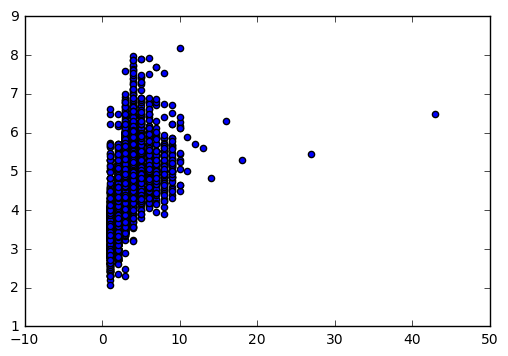

In [58]:
## Visulaizing
plt.scatter(ZZ['size'],ZZ['price'])
plt.show()

In [90]:


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
np.random.seed(100)
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(1322, kernel_initializer='normal',input_dim = x_A.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(60, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(20, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=5,verbose=1,mode='auto')
checkpointer = ModelCheckpoint(filepath='best_weights.hdf5',verbose=0,save_best_only=True)
NN_model.fit(x_A,y_A,validation_data=(x_test,y_test),callbacks = [monitor,checkpointer],verbose=0,epochs=5000)
NN_model.load_weights('best_weights.hdf5')

Epoch 00012: early stopping


In [79]:
y_pred = NN_model.predict(x_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred))

0.35369064112858367

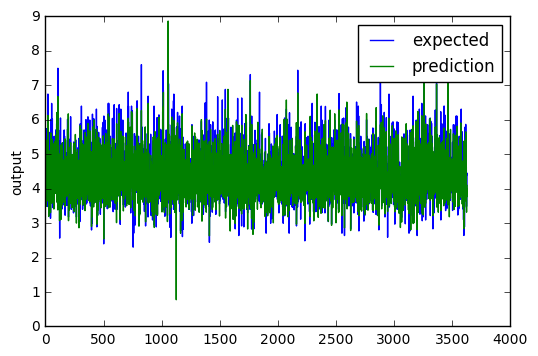

In [80]:
a = plt.plot(y_test.tolist(),label='expected')
b = plt.plot(y_pred.tolist(),label='prediction')
plt.ylabel('output')
plt.legend()
plt.show()   

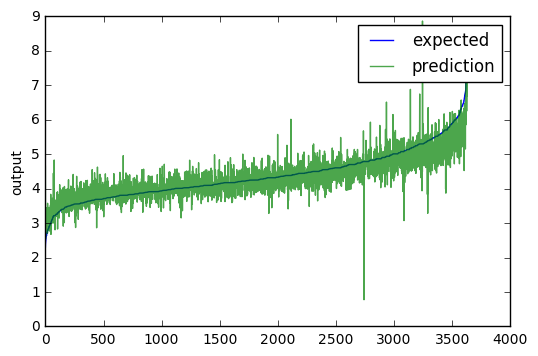

In [81]:
y_predt = pd.DataFrame(y_pred)
y_predt.columns = ['pred']
y_testt = pd.DataFrame(y_test)
y_testt.columns = ['test']
y_predt.reset_index(drop=True, inplace=True)
y_testt.reset_index(drop=True, inplace=True)
Combine = pd.concat([y_predt,y_testt],axis=1)
Combine.sort_values(by=['test'],inplace=True)
resid = Combine['pred'] - Combine['test']
a = plt.plot(Combine['test'].tolist(),label='expected')
b = plt.plot(Combine['pred'].tolist(),label='prediction',alpha=0.7)
plt.ylabel('output')
plt.legend()
plt.show()   

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
import xgboost as xgb
model1=xgb.XGBRegressor(nthread=4, 
              learning_rate = 0.03,
              max_depth = 5,
              min_child_weight=4,
              silent = 1,
              subsample=0.7,
              colsample_bytree=0.7,
              n_estimators=500)
model1.fit(x_A, y_A)
y_pred1 = model1.predict(x_test)
sqrt(mean_squared_error(y_test,y_pred1))
##model3.score(x_test,y_pred13)

0.32208014462491125

In [65]:
model2=xgb.XGBRegressor(nthread=4, 
              learning_rate = 0.03,
              max_depth = 5,
              min_child_weight=4,
              silent = 1,
              subsample=0.7,
              colsample_bytree=0.7,
              n_estimators=500)
model2.fit(x_B, y_B)
y_pred2 = model2.predict(x_test)
sqrt(mean_squared_error(y_test,y_pred2))

0.3213694874637545

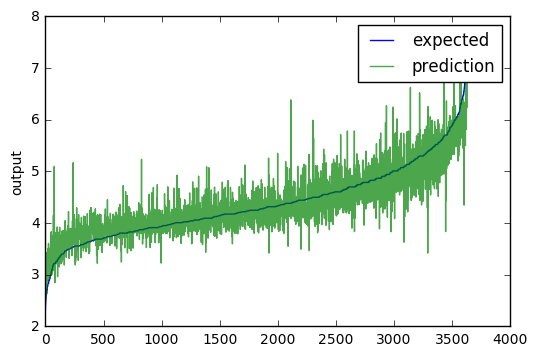

In [66]:
y_pred1t = pd.DataFrame(y_pred1)
y_pred1t.columns = ['pred']
y_testt = pd.DataFrame(y_test)
y_testt.columns = ['test']
y_pred1t.reset_index(drop=True, inplace=True)
y_testt.reset_index(drop=True, inplace=True)
Combine = pd.concat([y_pred1t,y_testt],axis=1)
Combine.sort_values(by=['test'],inplace=True)
a = plt.plot(Combine['test'].tolist(),label='expected')
b = plt.plot(Combine['pred'].tolist(),label='prediction',alpha=0.7)
plt.ylabel('output')
plt.legend()
plt.show()   

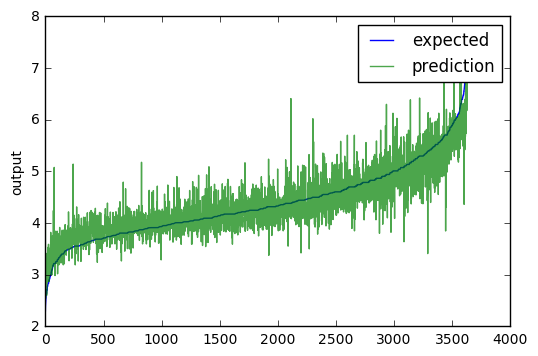

In [67]:
y_pred2t = pd.DataFrame(y_pred2)
y_pred2t.columns = ['pred']
y_testt = pd.DataFrame(y_test)
y_testt.columns = ['test']
y_pred2t.reset_index(drop=True, inplace=True)
y_testt.reset_index(drop=True, inplace=True)
Combine = pd.concat([y_pred2t,y_testt],axis=1)
Combine.sort_values(by=['test'],inplace=True)
a = plt.plot(Combine['test'].tolist(),label='expected')
b = plt.plot(Combine['pred'].tolist(),label='prediction',alpha=0.7)
plt.ylabel('output')
plt.legend()
plt.show()   

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import lightgbm as lgb
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': 0}
n_estimators = 300

n_iters = 4
preds_buf = []
err_buf = []
for i in range(n_iters): 
    x_train1, x_valid, y_train1, y_valid = train_test_split(x_A, y_A, test_size=0.10, random_state=i)
    d_train = lgb.Dataset(x_train1, label=y_train1)
    d_valid = lgb.Dataset(x_valid, label=y_valid)
    watchlist = [d_valid]

    model3 = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1)

    preds = model3.predict(x_valid)
    err =sqrt(mean_squared_error(y_valid,preds))
    err_buf.append(err)
    print('RMSE = ' + str(err))
    
    preds = model3.predict(x_test)
    preds_buf.append(preds)

print('Mean RMSE = ' + str(np.mean(err_buf)) + ' +/- ' + str(np.std(err_buf)))
# Average predictions
y_pred3 = np.mean(preds_buf, axis=0)
sqrt(mean_squared_error(y_test,y_pred3))

RMSE = 0.35744951230976235
RMSE = 0.34710435968288855
RMSE = 0.369458949119018
RMSE = 0.32572754832119655
Mean RMSE = 0.3499350923582164 +/- 0.01605977681824933


0.330832669542873

In [69]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 8, 
    'learning_rate': 0.1,
    'verbose': 0}
n_estimators = 200

n_iters = 7
preds_buf = []
err_buf = []
for i in range(n_iters): 
    x_train1, x_valid, y_train1, y_valid = train_test_split(x_B, y_B, test_size=0.10, random_state=i)
    d_train = lgb.Dataset(x_train1, label=y_train1)
    d_valid = lgb.Dataset(x_valid, label=y_valid)
    watchlist = [d_valid]

    model4 = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1)

    preds = model4.predict(x_valid)
    err =sqrt(mean_squared_error(y_valid,preds))
    err_buf.append(err)
    print('RMSE = ' + str(err))
    
    preds = model4.predict(x_test)
    preds_buf.append(preds)

print('Mean RMSE = ' + str(np.mean(err_buf)) + ' +/- ' + str(np.std(err_buf)))
# Average predictions
y_pred4 = np.mean(preds_buf, axis=0)
sqrt(mean_squared_error(y_test,y_pred4))

RMSE = 0.3455122841298846
RMSE = 0.36128429376897325
RMSE = 0.37436536115071817
RMSE = 0.34275075447065545
RMSE = 0.31056554046974794
RMSE = 0.32023925979710505
RMSE = 0.3533662753300796
Mean RMSE = 0.34401196701673775 +/- 0.02068405720338307


0.3268297362059941

In [105]:
y_pred4.shape

(3628,)

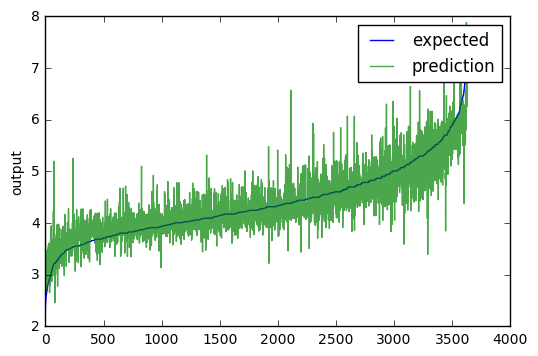

In [70]:
y_pred3t = pd.DataFrame(y_pred3)
y_pred3t.columns = ['pred']
y_testt = pd.DataFrame(y_test)
y_testt.columns = ['test']
y_pred3t.reset_index(drop=True, inplace=True)
y_testt.reset_index(drop=True, inplace=True)
Combine = pd.concat([y_pred3t,y_testt],axis=1)
Combine.sort_values(by=['test'],inplace=True)
a = plt.plot(Combine['test'].tolist(),label='expected')
b = plt.plot(Combine['pred'].tolist(),label='prediction',alpha=0.7)
plt.ylabel('output')
plt.legend()
plt.show()   

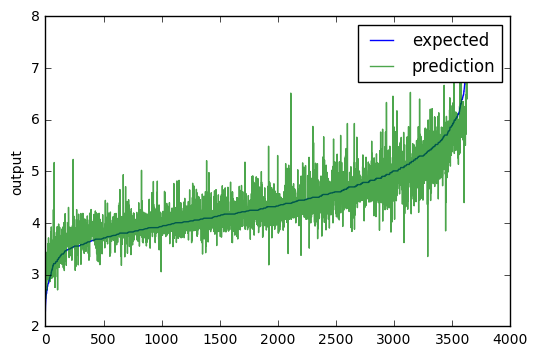

In [71]:
y_pred4t = pd.DataFrame(y_pred4)
y_pred4t.columns = ['pred']
y_testt = pd.DataFrame(y_test)
y_testt.columns = ['test']
y_pred4t.reset_index(drop=True, inplace=True)
y_testt.reset_index(drop=True, inplace=True)
Combine = pd.concat([y_pred4t,y_testt],axis=1)
Combine.sort_values(by=['test'],inplace=True)
a = plt.plot(Combine['test'].tolist(),label='expected')
b = plt.plot(Combine['pred'].tolist(),label='prediction',alpha=0.7)
plt.ylabel('output')
plt.legend()
plt.show()   

In [72]:
## training on High values
from sklearn.metrics import mean_squared_error
from math import sqrt
import lightgbm as lgb
Ttr = Train.loc[(Train['price'] > 4)]
Tt = Test.loc[(Test['price'] > 4)]
x_trains = Ttr.drop('price',axis=1)
y_trains = Ttr['price']
x_tests = Tt.drop('price',axis=1)
y_tests = Tt['price']
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 28, 
    'learning_rate': 0.01,
    'verbose': 0}
n_estimators = 800

n_iters = 10
preds_buf = []
err_buf = []
for i in range(n_iters): 
    x_train1, x_valid, y_train1, y_valid = train_test_split(x_trains, y_trains, test_size=0.10, random_state=i)
    d_train = lgb.Dataset(x_train1, label=y_train1)
    d_valid = lgb.Dataset(x_valid, label=y_valid)
    watchlist = [d_valid]

    model5 = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1)

    preds = model5.predict(x_valid)
    err =sqrt(mean_squared_error(y_valid,preds))
    err_buf.append(err)
    print('RMSE = ' + str(err))
    
    preds = model5.predict(x_tests)
    preds_buf.append(preds)

print('Mean RMSE = ' + str(np.mean(err_buf)) + ' +/- ' + str(np.std(err_buf)))
y_pred5 = np.mean(preds_buf, axis=0)
sqrt(mean_squared_error(y_tests,y_pred5))

RMSE = 0.32434581064278556
RMSE = 0.34501294393496346
RMSE = 0.3333186202728326
RMSE = 0.36401691794169794
RMSE = 0.3348008315174909
RMSE = 0.3151582770529458
RMSE = 0.3535960698816383
RMSE = 0.2962143138166947
RMSE = 0.3338214124696349
RMSE = 0.29782429098743185
Mean RMSE = 0.3298109488518116 +/- 0.021015746853347082


0.31984364383769226

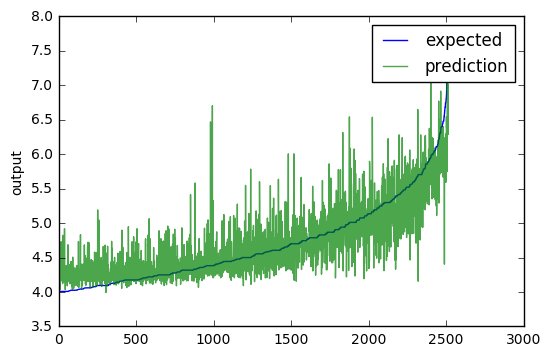

In [73]:
y_pred5t = pd.DataFrame(y_pred5)
y_pred5t.columns = ['pred']
y_testt = pd.DataFrame(y_tests)
y_testt.columns = ['test']
y_pred5t.reset_index(drop=True, inplace=True)
y_testt.reset_index(drop=True, inplace=True)
Combine = pd.concat([y_pred5t,y_testt],axis=1)
Combine.sort_values(by=['test'],inplace=True)
a = plt.plot(Combine['test'].tolist(),label='expected')
b = plt.plot(Combine['pred'].tolist(),label='prediction',alpha=0.7)
plt.ylabel('output')
plt.legend()
plt.show()   

In [93]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
np.random.seed(100)
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(1322, kernel_initializer='normal',input_dim = x_A.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(60, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(20, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=5,verbose=1,mode='auto')
checkpointer = ModelCheckpoint(filepath='best_weights.hdf5',verbose=0,save_best_only=True)
NN_model.fit(x_A,y_A,validation_data=(x_test,y_test),callbacks = [monitor,checkpointer],verbose=0,epochs=5000)
NN_model.load_weights('best_weights.hdf5')

Epoch 00017: early stopping


In [94]:
y_pred = NN_model.predict(x_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred))

0.3513112496505654

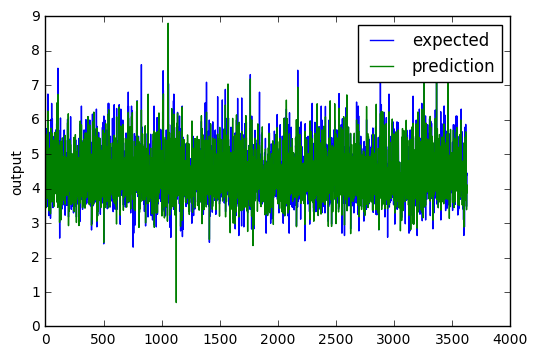

In [95]:
a = plt.plot(y_test.tolist(),label='expected')
b = plt.plot(y_pred.tolist(),label='prediction')
plt.ylabel('output')
plt.legend()
plt.show()   

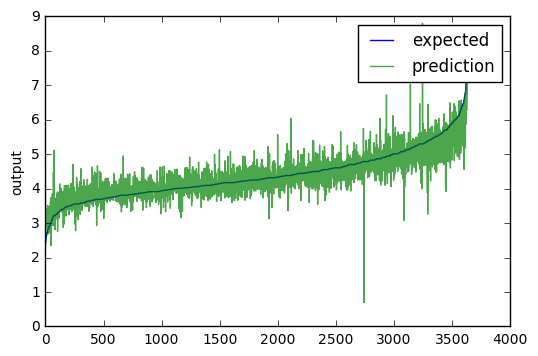

In [96]:
y_predt = pd.DataFrame(y_pred)
y_predt.columns = ['pred']
y_testt = pd.DataFrame(y_test)
y_testt.columns = ['test']
y_predt.reset_index(drop=True, inplace=True)
y_testt.reset_index(drop=True, inplace=True)
Combine = pd.concat([y_predt,y_testt],axis=1)
Combine.sort_values(by=['test'],inplace=True)
resid = Combine['pred'] - Combine['test']
a = plt.plot(Combine['test'].tolist(),label='expected')
b = plt.plot(Combine['pred'].tolist(),label='prediction',alpha=0.7)
plt.ylabel('output')
plt.legend()
plt.show()   

In [135]:
## Ensembling
w1 = 0.35
w2 = 0.1
w3 = 0.075
w4 = 0.075
w5 = 0.4
y_pred = NN_model.predict(x_test)
y_pred = np.reshape(y_pred,(3628,))
Y = w1*model1.predict(x_test) + w2*model2.predict(x_test) + w3*model3.predict(x_test) + w4*model4.predict(x_test) + w5*y_pred
sqrt(mean_squared_error(y_test,Y))

0.30688972990384317

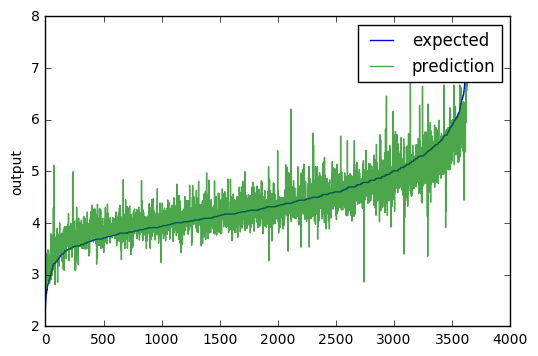

In [136]:
Y_pred = pd.DataFrame(Y)
Y_pred.columns = ['pred']
y_testt = pd.DataFrame(y_test)
y_testt.columns = ['test']
Y_pred.reset_index(drop=True, inplace=True)
y_testt.reset_index(drop=True, inplace=True)
Combine = pd.concat([Y_pred,y_testt],axis=1)
Combine.sort_values(by=['test'],inplace=True)
a = plt.plot(Combine['test'].tolist(),label='expected')
b = plt.plot(Combine['pred'].tolist(),label='prediction',alpha=0.7)
plt.ylabel('output')
plt.legend()
plt.show()  


In [141]:
## Final Model
J = CT
NN = range(0,1480)
J = J.reindex(NN)
y_predJ = NN_model.predict(J)
y_predJ = np.reshape(y_predJ,(1480,))
YCT = w1*model1.predict(J) + w2*model2.predict(J) + w3*model3.predict(J) + w4*model4.predict(J) + w5*y_predJ
YCT.shape

(1480,)

In [142]:
## Excel file
YCT = pd.DataFrame(np.exp(YCT))
writer = pd.ExcelWriter('output.xlsx')
YCT.to_excel(writer,'Sheet1')
writer.save()